In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

# Merge datasets for feature engineering
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [ ]:
# Aggregate customer-level features
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'TransactionID': 'count',  # Total transactions
    'Price_y': 'mean',  # Average price per product
    'Region': lambda x: x.mode()[0],  # Region (most frequent)
}).reset_index()

In [ ]:
# Encode categorical features
le = LabelEncoder()
customer_features['Region'] = le.fit_transform(customer_features['Region'])

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['TotalValue', 'TransactionID', 'Price_y']
customer_features[numerical_features] = scaler.fit_transform(customer_features[numerical_features])

# Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[numerical_features])

# Evaluate Clustering with DB Index
db_index = davies_bouldin_score(customer_features[numerical_features], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.0031741006145798


In [ ]:
# Visualize Clusters with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_features[numerical_features])
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

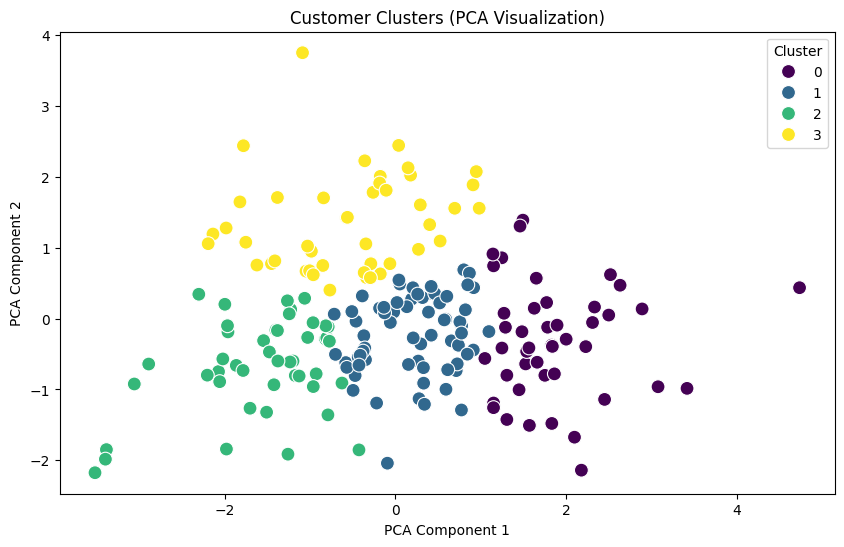

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='viridis', s=100
)
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()